
```
Name: Neha Upadhye
Student ID: 1002232340
```

In [ ]:
#Importing the required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading the  dataset
df = pd.read_csv('/content/dataset_NB.csv')

In [7]:
#Display first few rows to understand the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None


In [8]:
#Check for NaN values in each column
nan_values = df.isna().sum()

# Print NaN values column-wise
for column, count in nan_values.items():
    print(f'Column: {column} - NaN Values: {count}')

Column: email - NaN Values: 1
Column: label - NaN Values: 0


In [17]:
#Drop rows with any NaN values
df_cleaned = df.dropna()

#Check for NaN values in each column
nan_values = df_cleaned.isna().sum()

#Print NaN values column-wise
for column, count in nan_values.items():
    print(f'Column: {column} - NaN Values: {count}')

Column: email - NaN Values: 0
Column: label - NaN Values: 0


Accuracy: 0.9716666666666667
Confusion Matrix:
 [[493   7]
 [ 10  90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       500
           1       0.93      0.90      0.91       100

    accuracy                           0.97       600
   macro avg       0.95      0.94      0.95       600
weighted avg       0.97      0.97      0.97       600



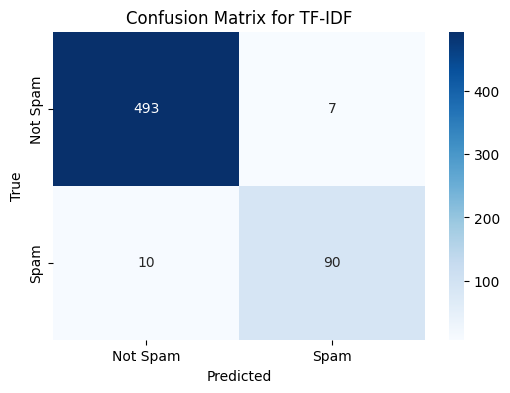

In [18]:
# Step 2: Preprocessing the data
# Assuming 'email' is the column containing the email text and 'Label' for the target
X = df_cleaned['email']
y = df_cleaned['label']

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000) # You can adjust max_features
X_transformed = vectorizer.fit_transform(X).toarray()

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 4: Training Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Predict on the test data
y_pred = nb_model.predict(X_test)

# Step 6: Calculate accuracy, confusion matrix, and report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)

# Step 6: Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TF-IDF')
plt.show()

# Step 7: Writing Report to a File
with open('report.txt', 'w') as f:
    f.write(f'Accuracy: {accuracy}\n')
    f.write('Confusion Matrix:\n')
    f.write(f'{conf_matrix}\n')
    f.write('Classification Report:\n')
    f.write(f'{report}\n')



**TF-IDF Method:**
*   True Positives (Spam correctly classified as Spam): 90
*   True Negatives (Not Spam correctly classified as Not Spam): 493
*   False Positives (Not Spam misclassified as Spam): 7
*   False Negatives (Spam misclassified as Not Spam): 10

**Analysis:**
The model is quite accurate in classifying both spam and non-spam emails. Out of 100 spam emails, it correctly identifies 90, while misclassifying 10.
It only misclassifies 7 non-spam emails as spam, which is a low error rate.
Overall, the model using TF-IDF appears to perform well, especially in detecting non-spam emails with very few misclassifications.

Accuracy: 0.9583333333333334
Confusion Matrix:
 [[491   9]
 [ 16  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       500
           1       0.90      0.84      0.87       100

    accuracy                           0.96       600
   macro avg       0.94      0.91      0.92       600
weighted avg       0.96      0.96      0.96       600



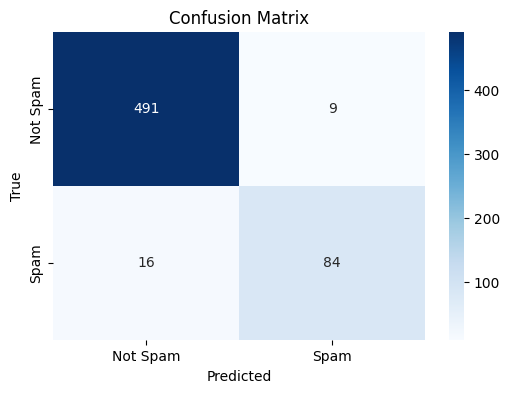

In [16]:
#Convert text data into numerical features using Bag of Words
vectorizer = CountVectorizer(stop_words='english')  # Removing English stopwords
X_transformed = vectorizer.fit_transform(X).toarray()

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes (GaussianNB) model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Predict on the test data
y_pred = nb_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy, confusion matrix, and classification report
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Bag of Words')
plt.show()

# Step 7: Writing Report to a File
with open('report_bag_of_words.txt', 'w') as f:
    f.write(f'Accuracy: {accuracy}\n')
    f.write('Confusion Matrix:\n')
    f.write(f'{conf_matrix}\n')
    f.write('Classification Report:\n')
    f.write(f'{report}\n')

**Bag of Words Method:**
*   True Positives (Spam correctly classified as Spam): 84
*   True Negatives (Not Spam correctly classified as Not Spam): 491
*   False Positives (Not Spam misclassified as Spam): 9
*   False Negatives (Spam misclassified as Not Spam): 16

**Analysis:**
The model performs slightly worse than TF-IDF when using Bag of Words. It misclassifies 16 spam emails as non-spam, meaning that 16 spam emails are wrongly predicted.
It also has more false positives (9), misclassifying non-spam emails as spam.
While the Bag of Words method is still reasonably effective, it’s clear that the TF-IDF method provides better performance in this case, especially in terms of minimizing false negatives (i.e., fewer spam emails are missed).